In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv', encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')

In [3]:
train.columns = ['ID', 'Region', 'Territory', 'Pricing_Delivery_Terms_Quote_Appr',
       'Pricing_Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount', 'Stage',
       'Prod_Category_A']

test.columns = ['ID', 'Region', 'Territory', 'Pricing_Delivery_Terms_Quote_Appr',
       'Pricing_Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'Prod_Category_A']

In [4]:
train['Target'] = (train.Stage=='Closed Won').astype(int)
test['Target'] = (test.Sales_Contract_No!='None').astype(int)
train['Target'].value_counts()

1    9533
0    7414
Name: Target, dtype: int64

In [5]:
train.drop_duplicates(subset='Opportunity_ID', inplace=True)
test.drop_duplicates(subset='Opportunity_ID', inplace=True)

In [6]:
train.columns

Index(['ID', 'Region', 'Territory', 'Pricing_Delivery_Terms_Quote_Appr',
       'Pricing_Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency',

In [7]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
def expanding_mean(df):
    for col in df.columns.values.tolist():
        if df[col].dtype == 'object':
            cumsum = df.groupby(col)['Target'].cumsum() - df['Target']
            cumcnt = df.groupby(col).cumcount()
            df[col] = cumsum/cumcnt
            df[col].fillna(0.0, inplace=True)
        else:
            df[col].fillna(0.0, inplace=True)

In [9]:
expanding_mean(train)
expanding_mean(test)

In [10]:
train

,ID,Region,Territory,Pricing_Delivery_Terms_Quote_Appr,Pricing_Delivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Target
0,27761,0.000000,0.000000,1,1,1,1,0,0.000000,0.000000,...,2016,0.000000,10,0.000000,5272800.00,0.000000,5272800.0,0.0,0.000000,0
1,27760,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,...,2016,0.000000,0,0.000000,48230.00,0.000000,48230.0,0.0,0.000000,1
2,27446,0.000000,0.000000,0,0,0,0,0,0.500000,0.000000,...,2016,0.500000,0,0.000000,83865.60,0.000000,83865.6,1.0,0.500000,1
3,16808,1.000000,1.000000,1,0,1,0,0,0.000000,0.000000,...,2018,0.666667,14,1.000000,7421881.50,1.000000,7421881.5,0.0,0.666667,0
4,16805,0.500000,0.500000,1,0,1,0,0,0.000000,0.000000,...,2018,0.500000,25,0.500000,13357192.50,0.500000,13357192.5,0.0,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,18324,0.462488,0.333333,1,1,0,0,0,0.593161,0.645243,...,2016,0.515453,1,0.470682,401700.00,0.469199,401700.0,1.0,0.515453,1
16940,20827,0.445440,0.349515,1,0,0,0,0,0.266571,0.000000,...,2016,0.515503,20,0.461282,10751580.00,0.462150,21332500.0,0.0,0.515503,0
16942,8781,0.462654,0.802817,1,1,1,1,0,0.593216,0.000000,...,2016,0.515450,0,0.470852,103350.00,0.469368,299715.0,1.0,0.515450,1
16945,28561,0.445258,0.348837,1,1,1,1,0,0.593271,0.000000,...,2016,0.515500,4,0.461185,2346796.88,0.462053,0.0,0.0,0.515500,0


In [11]:
from matplotlib import pyplot as plt

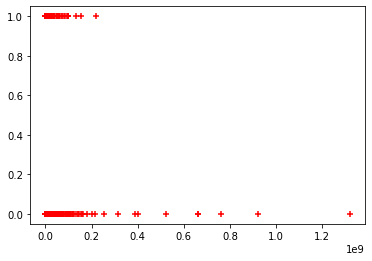

In [12]:
plt.scatter(train['Total_Amount'], train['Target'], marker='+', color='red')

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(train.drop(columns=['Target', 'Stage', 'Opportunity_ID']), train['Target'])

LogisticRegression()

In [16]:
test['Prediction'] = model.predict(test.drop(columns=['Target', 'Opportunity_ID']))

In [17]:
pp = model.predict_proba(test.drop(columns=['Target', 'Opportunity_ID', 'Prediction']))
pp

array([[0.48640567, 0.51359433],
       [0.48713661, 0.51286339],
       [0.47230543, 0.52769457],
       ...,
       [0.4642609 , 0.5357391 ],
       [0.48354762, 0.51645238],
       [0.4808424 , 0.5191576 ]])

In [18]:
from sklearn.metrics import log_loss

In [19]:
log_loss(test.Target, pp)

0.6760253185156423

In [22]:
model.score(test.drop(columns=['Target', 'Opportunity_ID', 'Prediction']), test['Target'])

0.5552010210593491

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
#confusion_matrix(test.drop(columns=['Target', 'Opportunity_ID']), test['Target'])